In [2]:
###################### IMPORTS ##################3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

###################### FUNCTIONS ##################3
def show_losses():
    # Parse the data into a list of lists
    data = [list(map(float, line.split())) for line in losses]
    data = [np.mean(data, axis=0)]
    num_series = len(data)  # Assuming all lines have the same number of values

    cmap = plt.get_cmap('viridis')
    colors = [cmap(i / num_series) for i in range(num_series)]

    for i, values in enumerate(data):
        plt.plot(values, label=f'Series {i+1}', color=colors[i])

    plt.xlabel('Step')
    #plt.ylabel('Round')
    plt.title('Progress chart of LSTM training')
    plt.legend()
    plt.show()

def show_foods():    
    # Convert the data to a NumPy array
    data = [list(map(float, line.split())) for line in foods]
    data_array = np.array(data)

    # Create a heatmap using seaborn
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(data_array, cmap="YlGnBu", annot=False, fmt=".1f", linewidths=.5, cbar_kws={'label': 'Value'})

    # Create a custom legend
    handles = [heatmap]  # Add the heatmap as a handle to the legend
    #labels = [legend_labels[i] for i in range(len(legend_labels))]
    #@plt.legend(handles=handles, labels=labels, title='Movement')
    #plt.legend()

    plt.title('Food collected')
    plt.xlabel('Step')
    plt.ylabel('Round')
    plt.show()

def show_movements():
    # Convert the data to a NumPy array
    data = [list(map(float, line.split())) for line in movements]
    data_array = np.array(data)

    # Create a heatmap using seaborn
    movement_labels = {0: 'Forward', 1: 'Backward', 2: 'Left', 3: 'Right'}
    plt.figure(figsize=(10, 8))
    plt.imshow(data_array, cmap='viridis', aspect='auto')

    # Adding labels and title
    plt.xlabel('Timestep')
    plt.ylabel('Round')
    plt.title('Movements Over Time')

    # Adding custom ticks and labels
    plt.xticks(np.arange(len(data[0])), range(1, len(data[0]) + 1))
    plt.yticks(np.arange(len(data)), range(1, len(data) + 1))

    # Adding a colorbar with custom labels
    cbar = plt.colorbar(ticks=list(movement_labels.keys()))
    cbar.set_ticklabels(list(movement_labels.values()))
    cbar.set_label('Movement Type')

    #scatter_food_eaten()

    # Display the plot
    #plt.show()


def scatter_food_eaten():
    # Convert the data to NumPy arrays
    movements_data = [list(map(float, line.split())) for line in movements]
    movements_array = np.array(movements_data)

    foods_data = [list(map(float, line.split())) for line in foods]
    foods_array = np.array(foods_data)

    # Create a heatmap using seaborn
    movement_labels = {0: 'Forward', 1: 'Backward', 2: 'Left', 3: 'Right'}
    plt.figure(figsize=(10, 8))
    plt.imshow(movements_array, cmap='viridis', aspect='auto')

    # Adding labels and title
    plt.xlabel('Timestep')
    plt.ylabel('Round')
    plt.title('Movements Over Time')

    # Adding custom ticks and labels
    #plt.xticks(np.arange(len(movements_data[0])), range(1, len(movements_data[0]) + 1))
    #plt.yticks(np.arange(len(movements_data)), range(1, len(movements_data) + 1))

    # Adding a colorbar with custom labels
    cbar = plt.colorbar(ticks=list(movement_labels.keys()))
    cbar.set_ticklabels(list(movement_labels.values()))
    cbar.set_label('Movement Type')

    # Scatter plot for foods when the value is greater than the previous value
    # Initialize an empty legend
    legend_labels = set()

    # Scatter plot for foods for all values
    for i in range(len(foods_data)):
        for j in range(len(foods_data[i])):
            if foods_data[i][j] > 0:
                label = f'Food: {int(foods_data[i][j])}'
                if label not in legend_labels:
                    plt.scatter(j, i, marker='o', color='red', s=foods_data[i][j] * 20, label=label)
                    legend_labels.add(label)
    plt.legend()

    for i in range(len(foods_data)):
        for j in range(1, len(foods_data[i])):
            if foods_data[i][j] > foods_data[i][j-1]:
                plt.scatter(j, i, marker='o', color='red', s=foods_data[i][j] * 20, alpha=0.7)

    # Display the plot
    plt.show()


###################### FUNCTION CALLS ##################

'''
with open(f"./catkin_ws/losses.txt", "r") as file:
    losses = file.readlines()
    show_losses()

with open(f"./catkin_ws/foods.txt", "r") as file:
    foods = [line.strip().replace('\n', '') for line in file.readlines()]
    show_foods()

with open(f"./catkin_ws/movements.txt", "r") as file:
    movements = [line.strip().replace('\n', '') for line in file.readlines()]
    #show_movements(movements, foods)
    scatter_food_eaten()
'''




folder_path = "./catkin_ws/"


def get_data(prefix):
    # List all files in the folder
    all_files = os.listdir(folder_path)

    # Filter files that start with 'res_foods_' and have a number behind it
    filtered_files = [file for file in all_files if file.startswith(prefix) and file[len(prefix)].isdigit()]

    # Sort the filtered files based on the number behind 'res_foods_'
    sorted_files = sorted(filtered_files, key=lambda x: int(x[len(prefix)]))

    # Read the contents of each file into an array
    file_contents_array = []

    for file_name in sorted_files:
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            file_contents = file.read()
            file_contents_array.append(file_contents)
        
    return file_contents_array

c:\Users\markd\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\markd\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


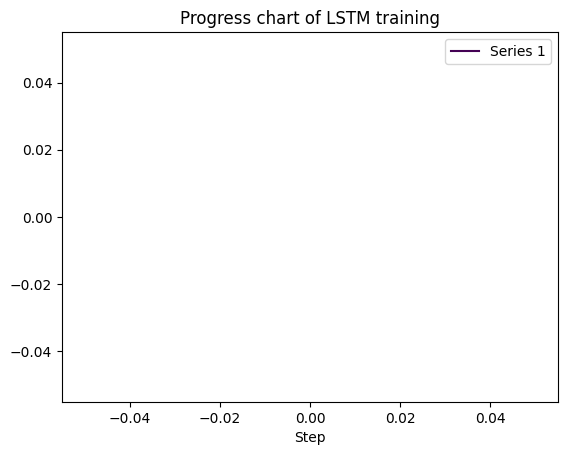

[]


TypeError: Invalid shape (0,) for image data

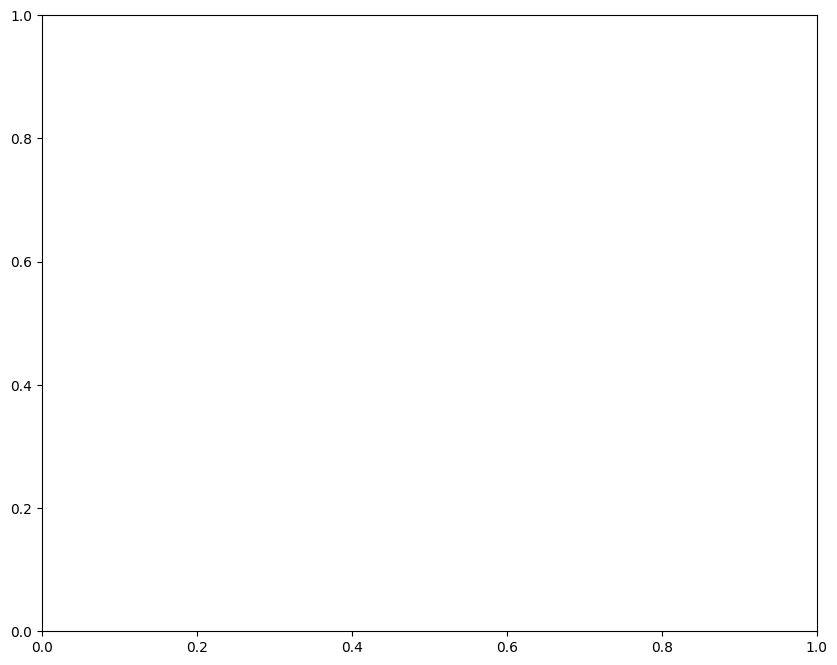

In [3]:
movements = get_data("res_action_")
foods = get_data("res_food_")
losses = get_data("res_loss_")
show_losses()
print(movements)
scatter_food_eaten()
show_foods()

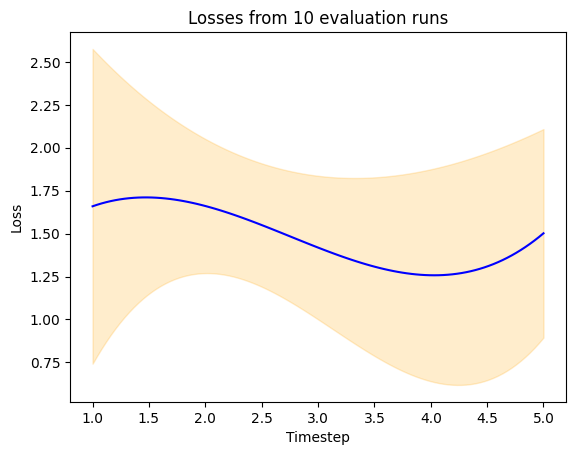

In [ ]:
from scipy.interpolate import UnivariateSpline

def show_values(values, round_):
    plt.plot(values, marker='o', linestyle='-', label = round_)


#file_path = 'eval_loss'
file_path = 'eval_loss_'
data_points = []

for x in range(10):
    with open('./catkin_ws/eval_data/' + file_path + str(x)+'.txt', 'r') as file:
        file_contents = file.read() 

    loss_values_list_str = file_contents.split()

    # Convert each string element to a float
    loss_values = [float(value) for value in loss_values_list_str]
    data_points.append(loss_values)

data = data_points
# Calculate mean and standard deviation for each column
mean_values = [sum(col) / len(col) for col in zip(*data)]
std_dev_values = [((sum((x - mean) ** 2 for x in col) / len(col)) ** 0.5) for col, mean in zip(zip(*data), mean_values)]

# Create x-axis values (assuming each column represents a category)
categories = list(range(1, len(mean_values) + 1))

# Interpolate smooth curves for mean and standard deviation
smooth_mean = UnivariateSpline(categories, mean_values)
smooth_std_dev = UnivariateSpline(categories, std_dev_values)

# Create a finer x-axis for smoother plotting
fine_categories = np.linspace(min(categories), max(categories), 100)

# Plot the smooth mean values as a line graph
plt.plot(fine_categories, smooth_mean(fine_categories), label='Smooth Mean', linestyle='-', color='blue')

# Plot the smooth standard deviation as a shaded region
plt.fill_between(fine_categories, smooth_mean(fine_categories) - smooth_std_dev(fine_categories),
    smooth_mean(fine_categories) + smooth_std_dev(fine_categories), alpha=0.2, color='orange', label='Smooth Std Dev')

# Add labels and title
# Add labels and title
plt.xlabel('Timestep')
plt.ylabel('Loss')
plt.title('Losses from 10 evaluation runs')


# Show the plot
plt.show()

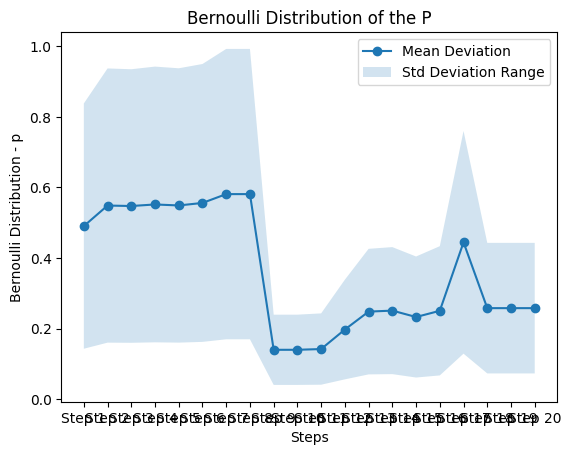

In [ ]:
file_path = 'eval_pees_'
data_points = []

mean_dev = []
std_dev = []
for x in range(1,2):
    with open('./catkin_ws/eval_data/' + file_path + str(x)+'.txt', 'r') as file:
        file_contents = file.read()

    file_contents = str(file_contents).replace("][", "],[")
    file_contents = str("[") + file_contents + str("]")
    data = eval(file_contents)

    # Find the highest value in each array
    highest_values = np.max(data, axis=1)

    # Calculate the deviation of each point from the highest value in its array
    deviations = data - highest_values[:, np.newaxis]

    # Calculate the mean deviation and standard deviation
    mean_deviation = np.abs(deviations[:, 1:]).mean(axis=1)
    mean_dev.append(mean_deviation)
    std_deviation = np.abs(deviations[:, 1:]).std(axis=1)
    std_dev.append(std_deviation)

######
mean_deviation = np.mean(mean_dev, axis=0)
std_deviation =  np.mean(std_dev, axis=0)

######

# Plot the mean deviation from the highest value with filled region
fig, ax = plt.subplots()
ax.plot(np.arange(len(data)), mean_deviation, marker='o', linestyle='-', label='Mean Deviation')
ax.fill_between(np.arange(len(data)), mean_deviation - std_deviation, mean_deviation + std_deviation, alpha=0.2, label='Std Deviation Range')
ax.set_xticks(np.arange(len(data)))
ax.set_xticklabels(['Step {}'.format(i + 1) for i in range(len(data))])
ax.set_ylabel('Mean Deviation from Highest Value')
plt.title('Bernoulli Distribution of the P')
plt.xlabel("Steps")
plt.ylabel("Bernoulli Distribution - p")
plt.legend()
plt.show()

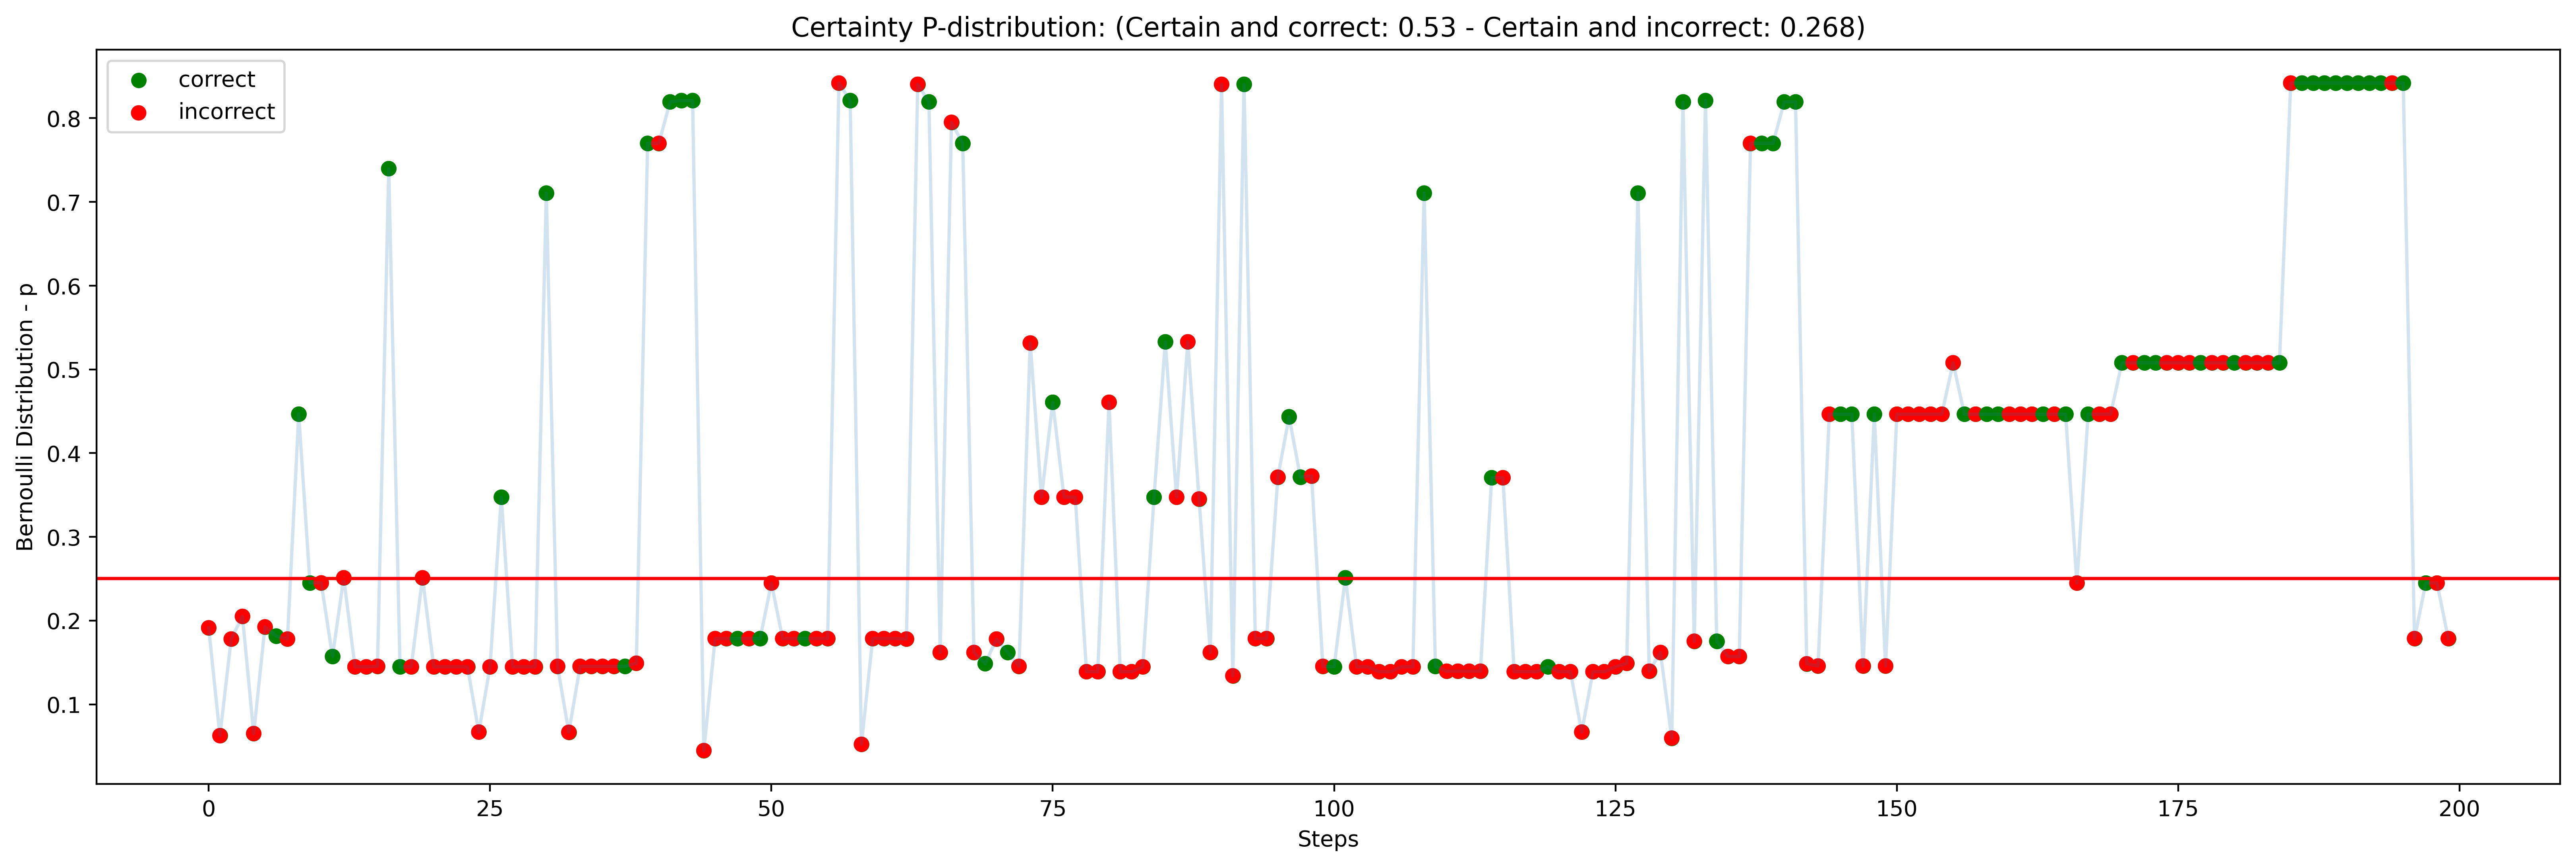

In [10]:
file_path = 'eval_pees_'
for x in range(1):
    with open('./catkin_ws/eval_data/' + file_path + str(x)+'.txt', 'r') as file:
        file_contents = file.read()

    file_contents = str(file_contents).replace("][", "],[")
    file_contents = str("[") + file_contents + str("]")
    data = eval(file_contents)

    # Find the highest value in each array
    highest_values = np.max(data, axis=1)
    with open('./catkin_ws/eval_data/' + 'eval_targets_' + str(x)+'.txt', 'r') as file:
        targets = list(map(int, list(file.read()[:-1].split(" "))))

    with open('./catkin_ws/eval_data/' + 'eval_actions_' + str(x)+'.txt', 'r') as file:
        actions = list(map(int, list(file.read()[:-1].split(" "))))
    data =np.array(data)
    highest_values = data[np.arange(len(data)), targets]
    correctness = np.equal(np.array(targets), np.array(actions))

file_path = 'eval_food_'
for x in range(1):
    with open('./catkin_ws/eval_data/' + file_path + str(x)+'.txt', 'r') as file:
        foods = list(map(int, file.read()[:-1].split(" ")))

######

# Plot the mean deviation from the highest value with filled region
'''
fig, ax = plt.subplots()
ax.plot(np.arange(len(data)), mean_deviation, marker='o', linestyle='-', label='Mean Deviation')
ax.fill_between(np.arange(len(data)), mean_deviation - std_deviation, mean_deviation + std_deviation, alpha=0.2, label='Std Deviation Range')
ax.set_xticks(np.arange(len(data)))
ax.set_xticklabels(['Step {}'.format(i + 1) for i in range(len(data))])
ax.set_ylabel('Mean Deviation from Highest Value')
'''
plt.figure(figsize=(20, 6), dpi=400)

increase_indices = np.where(np.diff(foods) == 1)[0] + 1
increase_indices -= 1

y_values = np.array(data)[increase_indices]
y_values = np.max(y_values, axis=1)

#sns.scatterplot(x=increase_indices, y=y_values, color='black', s=1000, label='Food eaten', marker="|", alpha = 0.5)

true_indices = np.where(correctness)[0]
true_values = [highest_values[i] for i in true_indices]

# Plot False values
false_indices = np.where(~np.array(correctness))[0]
false_values = [highest_values[i] for i in false_indices]

# Define colors based on correctness (green for True, red for False)
colors = np.where(correctness, 'green', 'red')
plt.scatter(range(0, len(data)), y=highest_values, color='green', label='correct') # Very inefficient double plotting
plt.scatter(range(0, len(data)), y=highest_values, color=colors, label='incorrect')
plt.plot(highest_values, alpha=0.2)
plt.axhline(y=0.25, color='r', linestyle='-')
plt.title(f'Certainty P-distribution: (Certain and correct: {str(round(np.mean(true_values),3))} - Certain and incorrect: {str(round(np.mean(false_values),3))})')
plt.xlabel("Steps")
plt.ylabel("Bernoulli Distribution - p")
plt.legend()
plt.show()

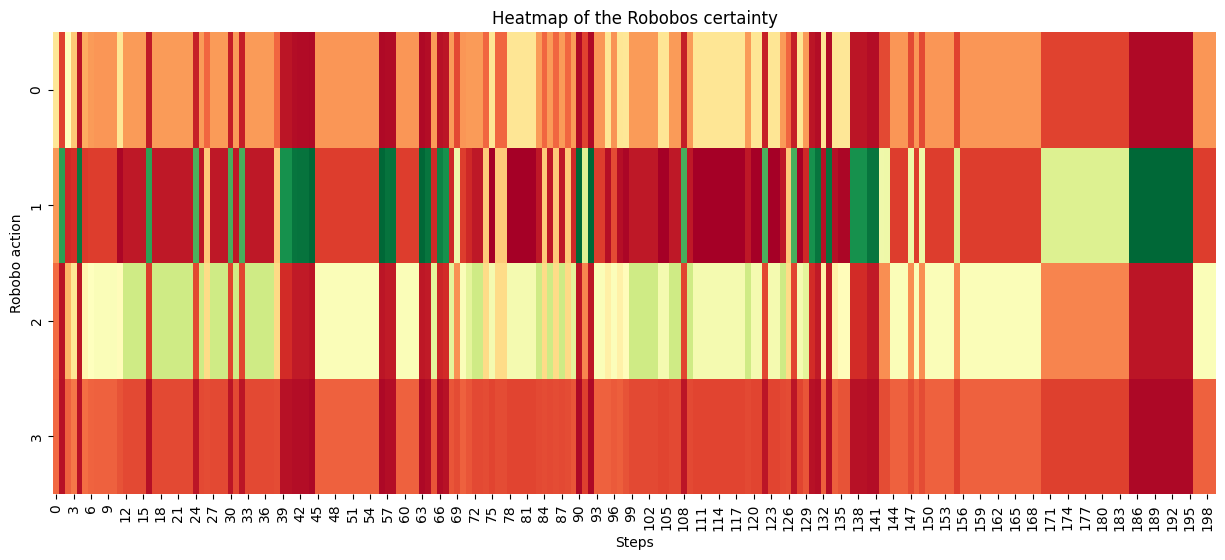

In [16]:

# Create a heatmap using Seaborn

#sns.heatmap(np.array(data).T, annot=False, cmap='viridis', fmt=".3f")


# Create a custom color map for Y-axis labels
#colors = ['green' if value else 'red' for value in correctness]


# Create a heatmap using Seaborn with inverted axis
from  matplotlib.colors import LinearSegmentedColormap

fig, ax = plt.subplots(figsize=(15, 6))  # Adjust the figure size
heatmap = sns.heatmap(np.array(data).T, annot=False, cmap=sns.color_palette("RdYlGn", as_cmap=True) , fmt=".3f", cbar=False)

#heatmap.xaxis.tick_top()
xticklabels = [label.get_text() for label in heatmap.get_xticklabels()]

#for i, color in enumerate(['green' if value else 'red' for value in correctness]):
    #heatmap.text(i, 0, xticklabels[i], ha='center', va='center', color=color)

# Customize the plot
plt.title('Heatmap of the Robobos certainty')
plt.xlabel('Steps')
plt.ylabel('Robobo action')

plt.show()

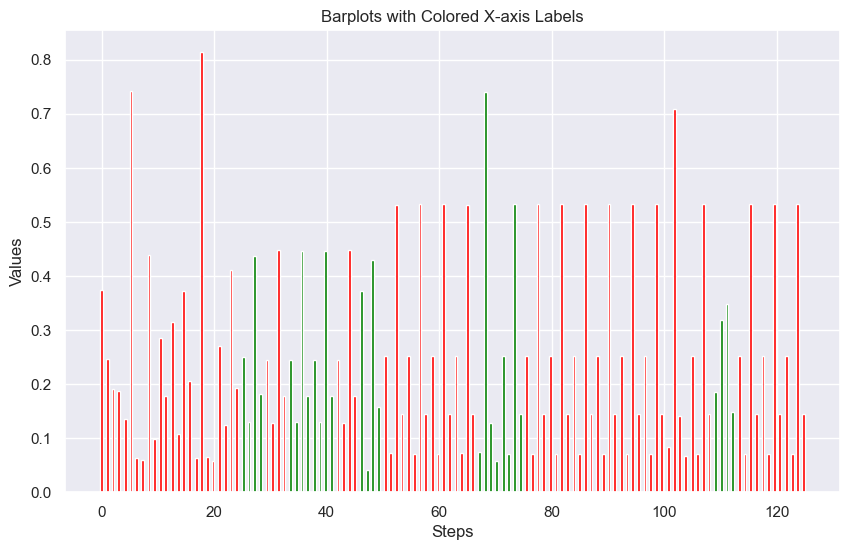

In [ ]:

size = 30
# Create barplots
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size
colors = ['green' if value else 'red' for value in correctness]

# Plot bars
bar_width = 0.1  # Adjust the bar width
sns.set_theme()

# Plot bars
for i, row in enumerate(data[:size]):
    ax.bar(np.arange(len(row)) + i * (len(row) + 0.2) , row, width=0.5, label=f'Step {i + 1}', color = colors[i])
    #ax.bar(np.arange(len(row)) + i * (len(row) + 0.2), row, width=0.1, label=f'Step {i + 1}', color = 'black')

# Customize X-axis labels colors
#xticklabels = [f'Step {i + 1}' for i in range(len(data[:size]))]
colors = ['green' if value else 'red' for value in correctness]


# Customize the plot
ax.set_title('Barplots with Colored X-axis Labels')
ax.set_xlabel('Steps')
ax.set_ylabel('Values')
#ax.legend()

# Show the plot
plt.show()

In [ ]:
## STACKED BARPLOT??